In [1]:
random_state = 20
def get_df_test_pred(pipeline):
    import json 
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import preprocessing
    dataset, model_name ,classifier =tuple(pipeline.split('+'))
    df = pd.read_csv(f'Arquivos TCC/datasets/{dataset}.csv', sep=';')
    df = df.dropna()
    textos = df['text']
    labels = df['label']
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    labels_enc = le.transform(labels)
    textos_train, textos_test, y_train, y_test = train_test_split(textos, labels_enc, test_size=0.10, random_state=random_state,stratify=labels_enc)
    df_test_pred = pd.read_csv(f'Arquivos TCC/test_set_predictions/{pipeline}.csv', sep=',')
    if dataset ==  'TC02_20news':
        df_test_pred['sentence'] = textos_test.to_list()
        df_test_pred['test_label'] = le.inverse_transform(df_test_pred['test_label'])
        df_test_pred['pred_label'] = le.inverse_transform(df_test_pred['pred_label'])
    if dataset == 'TC14_wos':
        with open("wos_label_map.json", "r") as read_file:
            label_map = json.load(read_file)
        df_test_pred['sentence'] = textos_test.to_list()  
        df_test_pred['test_label'] = df_test_pred['test_label'].apply(lambda x : label_map[str(x)])
        df_test_pred['pred_label'] = df_test_pred['pred_label'].apply(lambda x : label_map[str(x)])
    #df_test_pred['index_dataset'] = get_index_train_test(pipeline)[1]

    #print(labels)
    return df_test_pred

In [2]:
best_pipes = ["TC02_20news+TFIDF+SVC","TC14_wos+TFIDF+RF"]
df_test_pred = get_df_test_pred(best_pipes[1])
df_test_pred.head(10)

,test_label,pred_label,sentence
0,Social cognition,Social cognition,It was recently proposed that the neural subst...
1,Genetics,Immunology,Kawasaki disease is a multisystemic vasculitis...
2,Genetics,Genetics,The aim of the present study was to understand...
3,Digital control,Digital control,This paper explores the large-signal and small...
4,Digital control,Digital control,Design and implementation of a low cost grid-c...
5,Person perception,Person perception,Women are less likely than men to engage in se...
6,Molecular biology,Molecular biology,This study aims to investigate the impacts of ...
7,Social cognition,Nonverbal communication,The purpose of this study was to examine the u...
8,Person perception,Prejudice,Sexual harassment and coercion have mainly bee...
9,Digital control,Digital control,This paper presents a reference modification m...


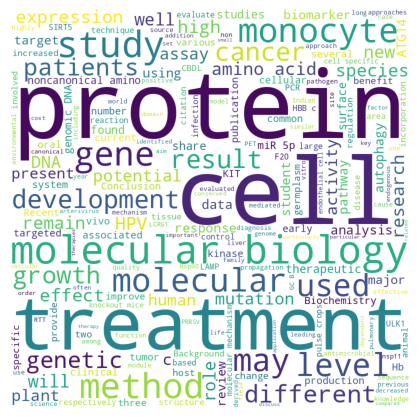

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                random_state=20,
                min_font_size = 10).generate(' '.join(df_test_pred[df_test_pred['test_label']=='Molecular biology']['sentence']))
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()